# 1. Pandas Basics

## 1.1 Data Structures

### a. Series
A Series is a one-dimensional labeled array capable of holding data of any type.

**Ways to create a Series**:

**1. From a list**:

In [3]:
import pandas as pd

s = pd.Series([1, 2, 3, 4])
print(s)

0    1
1    2
2    3
3    4
dtype: int64


**2. From a dictionary**:

In [3]:
s = pd.Series({'a': 10, 'b': 20, 'c': 30})
print(s)

a    10
b    20
c    30
dtype: int64


**3. Specifying an index**:

In [4]:
s = pd.Series([100, 200, 300], index=['x', 'y', 'z'])
print(s)

x    100
y    200
z    300
dtype: int64


**Operations**:

- Arithmetic operations on Series align by index:

In [5]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s2 = pd.Series([4, 5, 6], index=['b', 'c', 'd'])
print(s1 + s2)  # NaN for unmatched indices

a    NaN
b    6.0
c    8.0
d    NaN
dtype: float64


### b. DataFrame
A DataFrame is a table-like structure where rows and columns are labeled.

**Ways to create a DataFrame**:

**1. From a dictionary of lists**:

In [7]:
data = {'Name': ['Alice', 'Bob'], 'Age': [25, 30]}
df = pd.DataFrame(data)
print(df)

    Name  Age
0  Alice   25
1    Bob   30


**2. From a list of dictionaries**:

In [9]:
data = [{'Name': 'Alice', 'Age': 25}, {'Name': 'Bob', 'Age': 30}]
df = pd.DataFrame(data)
print(df)

    Name  Age
0  Alice   25
1    Bob   30


**3. From a NumPy array**:

In [12]:
import numpy as np
data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data, columns=['A', 'B'])
print(df)

   A  B
0  1  2
1  3  4


**4. From a CSV or other file format (covered in Section 3)**.

---

## 1.2 Reading and Writing Files

### Reading Data
**1. CSV Files**:

**Options**:
- *sep=','*: Specify the delimiter.
- *header=None*: No header row in the file.
- *header*: Specifies which row to use as column names (default is 0, the first row).
- *index_col*: Defines the column to use as the index.
- *dtype*: Allows specifying data types for columns.
- *names=['col1', 'col2']*: Specify custom column names.
- *usecols=['col1', 'col2']*: Load specific columns.
- *nrows=10*: Load only the first 10 rows.
- *skiprows=5*: Skip the first 5 rows.
- *encoding='utf-8'*: Specify file encoding.

**Example:**

In [ ]:
# Reading a CSV file with a tab delimiter and using a specific column as index
df = pd.read_csv('data.csv', sep='\t', index_col='ID')
print(df)

**2. Excel Files**:

Pandas also allows reading Excel files. You can use the pd.read_excel() function to read data from .xls and .xlsx files.

**Options**:
- *sheet_name=None*: Read all sheets into a dictionary of DataFrames.
- *sheet_name='Sheet1'*: Loads the sheet named 'Sheet1'. You can also use
- *skiprows*: Skip rows (like in CSVs).

**3. JSON Files**:

**Options**:
- *orient='records'*: Specify the format of the JSON file.

**4. SQL Databases**:

If your data is stored in a SQL database, Pandas can also handle that. You’ll need to install the required SQL database connector (e.g., sqlite3, sqlalchemy, or others).

- *pd.read_sql_query()*: Executes an SQL query and returns the result as a DataFrame.
- *conn*: The database connection object.

**5. Other formats**:
- **HDF5**: pd.read_hdf('file.h5', key='key')
- **Parquet**: pd.read_parquet('file.parquet')

### Writing Data
**1. CSV Files**:

In [ ]:
df.to_csv('output.csv', index=False)

**Options**:
- *index=False*: Prevents saving the DataFrame index as a column. If you want to save the index, set it to True
- *index=True*: Include the index.
- *sep=';'*: Specify the delimiter.

In [ ]:
df.to_csv('output.csv', sep=';', columns=['Name', 'Age'], index=False)

- *sep=';'*: Specifies a semicolon (;) as the delimiter.
- *columns=['Name', 'Age']*: Saves only the specified columns.
- *index=False*: Avoids writing the index.

**2. Excel Files**:

In [ ]:
df.to_excel('output.xlsx', index=False)

- *index=False*: Prevents saving the index as a separate column in the Excel file.

In [ ]:
with pd.ExcelWriter('output.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1', index=False)
    df.to_excel(writer, sheet_name='Sheet2', index=False)

- *ExcelWriter* allows you to write multiple DataFrames to different sheets in the same Excel file.

**3. JSON Files**:

In [ ]:
df.to_json('output.json', orient='records')

**4. SQL Databases**:

In [ ]:
df.to_sql('table_name', conn, if_exists='replace', index=False)

- *if_exists='replace'*: If the table exists, it will be replaced with the new data. You can also use 'append' to add data to the existing table.
- *index=False*: Prevents writing the index as a column.

**5. Other formats**:

- **HDF5**: df.to_hdf('file.h5', key='key', mode='w')
- **Parquet**: df.to_parquet('file.parquet')

### Handling Large Files
For large datasets, reading and writing files in chunks can help manage memory usage.

In [ ]:
chunk_size = 1000  # Number of rows per chunk
chunks = pd.read_csv('large_file.csv', chunksize=chunk_size)

# Process each chunk
for chunk in chunks:
    # Perform operations on each chunk
    print(chunk.head())

This is useful when working with datasets that are too large to fit into memory at once.

---

## 1.3 Exploring Data

### Key Concepts in Inspecting Data
**1. Understanding the Dataset**

- A dataset is a collection of data organized in rows and columns (like a table).
- **Rows**: Represent individual data points or samples (e.g., one row = one person).
- **Columns**: Represent features or variables (e.g., age, income, height).

**2. Common Formats of Datasets**

- **CSV (Comma-Separated Values)**: Text files where each row is a data record, and columns are separated by commas.
- **Excel Files**: .xls or .xlsx files often used for tabular data.
- **Databases**: Data stored in SQL databases.
- **JSON/XML**: For hierarchical or nested data.

**3. Loading Data into Python** Libraries like pandas help you load and manipulate datasets easily.

**4. Inspecting the Structure of the Dataset** Use these commands in pandas to get an overview of the data:df.head(), df.info(), df.describe().

**5. Checking for Missing Values** Missing values can impact your model's performance.

- df.isnull().sum(): Count missing values per column.
- Handle them using:
>- Dropping rows/columns (df.dropna()).
>- Imputation (filling missing values with the mean/median/mode).

**6. Checking for Duplicates** Duplicates can skew your results:

- df.duplicated(): Find duplicates.
- df.drop_duplicates(): Remove duplicate rows.

**7. Exploring Individual Columns**

- Check unique values: df['column_name'].unique()
- Value counts: df['column_name'].value_counts()

**8. Visualizing Data** Visualizations help you understand the data distribution and patterns.

- Histogram for numerical data:

In [ ]:
df['column_name'].hist()

- Boxplot for outliers:

In [ ]:
import seaborn as sns
sns.boxplot(data=df['column_name'])

**9. Understanding Data Distributions**

- **Mean, Median, Mode**: Central tendencies of data.
- **Variance/Standard Deviation**: Spread of data.
- **Outliers**: Extreme values that may need handling.

**10. Exploring Relationships Between Variables**
- Correlations: Use .corr() to find relationships between numerical columns.
- Scatter plots: Visualize relationships between two variables.

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['feature1'], df['feature2'])
plt.show()

### Basic Exploration
- **Top/Bottom Rows**:

In [22]:
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Elina', 'Fred', 'Greg'], 'Age': [25, 30, 35, 40, 25, 36, 28], 'Salary': [40000, 50000, 60000, 55000, 45000, 30000, 35000]}
df = pd.DataFrame(data)

print(df.head(5))  # First 5 rows
print(df.tail(5))  # Last 5 rows

      Name  Age  Salary
0    Alice   25   40000
1      Bob   30   50000
2  Charlie   35   60000
3    David   40   55000
4    Elina   25   45000
      Name  Age  Salary
2  Charlie   35   60000
3    David   40   55000
4    Elina   25   45000
5     Fred   36   30000
6     Greg   28   35000


- **Column Names and Shape**:

In [36]:
print(df.columns)  # List of column names
print(df.shape)    # (rows, columns)

Index(['Name', 'Age', 'Salary'], dtype='object')
(7, 3)


- **Data Types**:

In [37]:
print(df.dtypes)  # Data type of each column

Name      object
Age        int64
Salary     int64
dtype: object


### Summarizing Data
- **Info**:
 *df.info()*: Get information about columns, data types, and non-null values.

In [38]:
print(df.info())  # Summary of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    7 non-null      object
 1   Age     7 non-null      int64 
 2   Salary  7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 300.0+ bytes
None


- **Statistical Summary**:
 *df.describe()*: Summarize numerical columns (e.g., mean, median, standard deviation).

In [39]:
print(df.describe())  # Summary of numeric columns

             Age        Salary
count   7.000000      7.000000
mean   31.285714  45000.000000
std     5.822780  10801.234497
min    25.000000  30000.000000
25%    26.500000  37500.000000
50%    30.000000  45000.000000
75%    35.500000  52500.000000
max    40.000000  60000.000000


### Checking for Missing Data

In [40]:
print(df.isnull().sum())  # Count missing values per column

Name      0
Age       0
Salary    0
dtype: int64


---

# 2. Data Manipulation 

## 1. Selecting Data
### a. Selecting Columns
**1. Select a single column**:

In [41]:
df['Name']

0      Alice
1        Bob
2    Charlie
3      David
4      Elina
5       Fred
6       Greg
Name: Name, dtype: object

**2. Select multiple columns**:

In [42]:
df[['Age', 'Salary']]

,Age,Salary
0,25,40000
1,30,50000
2,35,60000
3,40,55000
4,25,45000
5,36,30000
6,28,35000


### b. Selecting Rows
**1. By position (iloc)**:

In [54]:
df.iloc[0]  # First row

Name      Alice
Age          25
Salary    40000
Name: 0, dtype: object

In [53]:
df.iloc[1:4]  # Rows 1 to 3

,Name,Age,Salary
1,Bob,30,50000
2,Charlie,35,60000
3,David,40,55000


**2. By label (loc)**:

In [49]:
df.loc[0]  # First row with label 0

Name      Alice
Age          25
Salary    40000
Name: 0, dtype: object

In [50]:
df.loc[0:3, ['Name', 'Salary']]  # Rows 0 to 3 with selected columns

,Name,Salary
0,Alice,40000
1,Bob,50000
2,Charlie,60000
3,David,55000


### c. Mixed Selection
Use both row and column indices:

In [52]:
df.iloc[0, 1]  # Row 0, Column 1

np.int64(25)

In [51]:
df.loc[0, 'Salary']  # Row 0, Column "column_name"

np.int64(40000)

---

## 2.2 Filtering Data

**1. Filter rows based on a condition**:

In [55]:
df[df['Age'] > 25]  # Rows where "Age" is greater than 25

,Name,Age,Salary
1,Bob,30,50000
2,Charlie,35,60000
3,David,40,55000
5,Fred,36,30000
6,Greg,28,35000


**2. Filter rows with multiple conditions**:

In [6]:
df[(df['Age'] > 25) & (df['Salary'] < 50000)]  # AND condition

,Name,Age,Salary
5,Fred,36,30000
6,Greg,28,35000


In [7]:
df[(df['Age'] > 25) | (df['Salary'] < 40000)]  # OR condition

,Name,Age,Salary
1,Bob,30,50000
2,Charlie,35,60000
3,David,40,55000
5,Fred,36,30000
6,Greg,28,35000


**3. Filter rows using isin**:

In [58]:
df[df['Name'].isin(['Alice', 'Bob'])]

,Name,Age,Salary
0,Alice,25,40000
1,Bob,30,50000


**4. Advanced Selection Using query**:
Use SQL-like syntax for filtering rows.

In [8]:
# Filter rows where Age > 25
print(df.query('Age > 25'))

      Name  Age  Salary
1      Bob   30   50000
2  Charlie   35   60000
3    David   40   55000
5     Fred   36   30000
6     Greg   28   35000


#### The query() method
in Pandas provides a powerful and concise way to filter rows of a DataFrame based on conditions. It uses a **string-based syntax**, which can make filtering operations cleaner and more readable compared to traditional boolean indexing.

- **1. Readability**: Conditions in query() are written in a natural, SQL-like syntax.
- **2. Efficiency**: Faster than boolean indexing for large DataFrames due to internal optimizations.
- **3. Dynamic Filtering**: Supports variables for dynamic condition building.

**Syntax**

In [ ]:
DataFrame.query(expr, inplace=False, **kwargs)

- *expr*: A string containing the condition to filter the DataFrame.
- *inplace*: If True, modifies the DataFrame in place.
- ***kwargs*: Additional arguments, like local_dict or global_dict, for defining variables.

In [9]:
# Sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 40],
        'Salary': [50000, 60000, 70000, 80000]}
df2 = pd.DataFrame(data)

# Filter rows where Age > 30
filtered = df2.query('Age > 30')
print(filtered)

      Name  Age  Salary
2  Charlie   35   70000
3    David   40   80000


In [11]:
# Rows where Age > 30 AND Salary > 65000
filtered = df2.query('Age > 35 and Salary > 65000')
print(filtered)

    Name  Age  Salary
3  David   40   80000


In [13]:
# Select specific columns after filtering
filtered = df2.query('Age > 30')[['Name', 'Salary']]
print(filtered)

      Name  Salary
2  Charlie   70000
3    David   80000


**Using Variables in query()**

You can pass external variables into the query string by referencing them with an @ symbol.

In [14]:
# Define a variable
threshold_age = 30

# Use the variable in query
filtered = df2.query('Age > @threshold_age')
print(filtered)

      Name  Age  Salary
2  Charlie   35   70000
3    David   40   80000


**Using String Operations in query()**

For string columns, use conditions like ==, !=, or .str.contains().

In [16]:
# Filter rows where Name equals 'Alice'
filtered = df2.query('Name == "Alice"')
print(filtered)

    Name  Age  Salary
0  Alice   25   50000


**Query with Mathematical Expressions**

In [17]:
# Filter where Salary is at least twice the Age times 1000
filtered = df2.query('Salary >= 2 * Age * 1000')
print(filtered)

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000
3    David   40   80000


**Using isnull() and notnull()**

In [18]:
# DataFrame with missing values
data = {'Name': ['Alice', 'Bob', None, 'David'],
        'Age': [25, 30, 35, 40]}
df_missing = pd.DataFrame(data)

# Filter rows where Name is not null
filtered = df_missing.query('Name.notnull()')
print(filtered)

    Name  Age
0  Alice   25
1    Bob   30
3  David   40


---

## 2.3 Modifying Data

### a. Adding Columns
Add a new column based on existing data:

In [3]:
df['New_Column'] = df['Age'] * 2
print(df)

      Name  Age  Salary  New_Column
0    Alice   25   40000          50
1      Bob   30   50000          60
2  Charlie   35   60000          70
3    David   40   55000          80
4    Elina   25   45000          50
5     Fred   36   30000          72
6     Greg   28   35000          56


### b. Modifying Existing Columns
Apply a function:

In [4]:
df['Age'] = df['Age'].apply(lambda x: x + 5)
print(df)

      Name  Age  Salary  New_Column
0    Alice   30   40000          50
1      Bob   35   50000          60
2  Charlie   40   60000          70
3    David   45   55000          80
4    Elina   30   45000          50
5     Fred   41   30000          72
6     Greg   33   35000          56


### c. Renaming Columns

In [5]:
df.rename(columns={'New_Column': 'Old_Column'}, inplace=True)
print(df)

      Name  Age  Salary  Old_Column
0    Alice   30   40000          50
1      Bob   35   50000          60
2  Charlie   40   60000          70
3    David   45   55000          80
4    Elina   30   45000          50
5     Fred   41   30000          72
6     Greg   33   35000          56


### d. Modifying Column Values

In [6]:
# Increase Salary by 10%
df['Salary'] = df['Salary'] * 1.1

# Apply a custom function to round Salary
df['Salary'] = df['Salary'].apply(lambda x: round(x))
print(df)

      Name  Age  Salary  Old_Column
0    Alice   30   44000          50
1      Bob   35   55000          60
2  Charlie   40   66000          70
3    David   45   60500          80
4    Elina   30   49500          50
5     Fred   41   33000          72
6     Greg   33   38500          56


### e. Dropping Columns or Rows
- **Drop columns**:

In [ ]:
df.drop(['Column1', 'Column2'], axis=1, inplace=True)

- **Drop rows**:

#### Understanding Dimensions
For a 2D array:

- **Axis 0**: Operates **along the rows** (column-wise operation).
- **Axis 1**: Operates **along the columns** (row-wise operation).

For a 3D array:

- **Axis 0**: Operates along the depth (across matrices).
- **Axis 1**: Operates along the rows (within each matrix).
- **Axis 2**: Operates along the columns (within each matrix).

### f. Changing Data Types

In [8]:
data = {'Name': ['1', '2', '3'], 'Age': [25.0, 30.5, 35.1]}
df3 = pd.DataFrame(data)

# Convert 'Name' to integers and 'Age' to integers
df3['Name'] = df3['Name'].astype(int)
df3['Age'] = df3['Age'].astype(int)
print(df3)

   Name  Age
0     1   25
1     2   30
2     3   35


---

## 2.4 Handling Missing Data
### 1. Detect Missing Values:

In [ ]:
df.isnull()  # Boolean mask of missing values
df.isnull().sum()  # Count missing values per column

### 2. Remove Missing Values:

In [ ]:
df.dropna()  # Drop rows with missing values
df.dropna(axis=1)  # Drop columns with missing values

### 3. Fill Missing Values:

In [ ]:
df.fillna(0)  # Replace missing values with 0
df.fillna(df.mean())  # Replace with column mean

In [22]:
data = {'Name': ['Alice', 'Bob', None], 'Age': [25, None, 35]}
df4 = pd.DataFrame(data)

# Fill missing values with a placeholder
df4['Name'].fillna('Unknown', inplace=True)

# Drop rows with missing values
df4.dropna(inplace=True)
print(df4)

      Name   Age
0    Alice  25.0
2  Unknown  35.0


C:\Users\Pardis\AppData\Local\Temp\ipykernel_560\1047999180.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['Name'].fillna('Unknown', inplace=True)


### 4. Replacing Values
Replace specific values to correct errors or standardize.

In [23]:
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Department': ['HR', 'IT', 'HR']}
df5 = pd.DataFrame(data)

# Replace 'HR' with 'Human Resources'
df5['Department'] = df5['Department'].replace('HR', 'Human Resources')
print(df5)

      Name       Department
0    Alice  Human Resources
1      Bob               IT
2  Charlie  Human Resources


### 5. Interpolate Missing Values:

In [ ]:
df.interpolate()

---

## 2.5 Sorting Data
### 1. Sort by a single column:

In [72]:
df.sort_values('Age', ascending=True)

,Name,Age,Salary,Old_Column
0,Alice,30,40000,50
4,Elina,30,45000,50
6,Greg,33,35000,56
1,Bob,35,50000,60
2,Charlie,40,60000,70
5,Fred,41,30000,72
3,David,45,55000,80


### 2. Sort by multiple columns:

In [74]:
df.sort_values(['Age', 'Salary'], ascending=[True, False])

,Name,Age,Salary,Old_Column
4,Elina,30,45000,50
0,Alice,30,40000,50
6,Greg,33,35000,56
1,Bob,35,50000,60
2,Charlie,40,60000,70
5,Fred,41,30000,72
3,David,45,55000,80


**Explanation**: First, the data is sorted by Age in ascending order. Then, for rows with the same Age, it is sorted by Salary in descending order (i.e., higher salaries come first).

---

## 2.6 Aggregating Data
### 1. Basic Aggregations:

In [77]:
df['Age'].mean()  # Average age

np.float64(36.285714285714285)

In [76]:
df['Salary'].sum()  # Sum of salaries

np.int64(315000)

### 2. Group By Operations:

In [80]:
grouped = df.groupby('Name')
print(grouped.mean())  # Mean for each group

          Age   Salary  Old_Column
Name                              
Alice    30.0  40000.0        50.0
Bob      35.0  50000.0        60.0
Charlie  40.0  60000.0        70.0
David    45.0  55000.0        80.0
Elina    30.0  45000.0        50.0
Fred     41.0  30000.0        72.0
Greg     33.0  35000.0        56.0


---

## 2.7 Duplicates
### 1. Detect duplicates:

In [ ]:
df.duplicated()

### 2. Remove duplicates:

In [ ]:
df.drop_duplicates(inplace=True)

---

# 3. Data Transformation and Visualization

## 3.1 Pivot Tables
Pivot tables allow you to summarize and aggregate data in a tabular format.
- Rearranges data into a new table format based on selected index (rows) and columns.
- Applies an aggregation function (e.g., mean, sum, count) to numeric data.

### Creating a Pivot Table

In [25]:
import pandas as pd

# Example DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Alice', 'Bob'],
    'Age': [25, 30, 40, 35],
    'Category': ['A', 'A', 'B', 'B'],
    'Score': [85, 90, 88, 75]
}
df = pd.DataFrame(data)

# Create pivot table
pivot = df.pivot_table(values='Score', index='Name', columns='Category', aggfunc='mean')
print(pivot)

Category     A     B
Name                
Alice     85.0  88.0
Bob       90.0  75.0


**Options**:

- *values*: Column to aggregate.
- *index*: Rows to group by.
- *columns*: Columns to group by.
- *aggfunc*: Aggregation function (default is 'mean'). Examples include:
>- mean: Average value.
>- sum: Total sum.
>- count: Number of entries.
>- max: Maximum value.
>- min: Minimum value.

- *fill_value=0*: If there’s no data for a specific combination of index and columns, pandas fills it with NaN. You can replace missing values with 0.

In [35]:
pivot = df.pivot_table(values='Score', index='Name', columns='Category', aggfunc=['mean', 'sum'])
print(pivot)

          mean       sum    
Category     A     B   A   B
Name                        
Alice     85.0  88.0  85  88
Bob       90.0  75.0  90  75


---

## 3.2 Reshaping Data
### a. Melting Data
Convert wide-form data into long-form data.
- Wide-format data has multiple columns that represent different values.
- Long-format data has fewer columns, with additional columns for identifiers and variable values.
- Long format is easier to use with many analytical tools and libraries.

In [41]:
data = {
    'Name': ['Alice', 'Bob'],
    'Math': [85, 90],
    'Science': [88, 75]
}
df = pd.DataFrame(data)
print('Unmelted: \n', df, '\n')

melted = df.melt(id_vars='Name', var_name='Subject', value_name='Score')
print('Melted: \n',melted)

Unmelted: 
     Name  Math  Science
0  Alice    85       88
1    Bob    90       75 

Melted: 
     Name  Subject  Score
0  Alice     Math     85
1    Bob     Math     90
2  Alice  Science     88
3    Bob  Science     75


**Key Parameters**
- *id_vars*: Columns to keep as identifiers (e.g., 'Name').
- *var_name*: The name of the column that will hold the old column names (e.g., 'Subject').
- *value_name*: The name of the column that will hold the values (e.g., 'Score').

In [42]:
data = {
    'Name': ['Alice', 'Bob'],
    'Year': [2021, 2021],
    'Math': [85, 90],
    'Science': [88, 75]
}
df = pd.DataFrame(data)

melted = df.melt(id_vars=['Name', 'Year'], var_name='Subject', value_name='Score')
print(melted)

    Name  Year  Subject  Score
0  Alice  2021     Math     85
1    Bob  2021     Math     90
2  Alice  2021  Science     88
3    Bob  2021  Science     75


### When to Use Pivot vs Melt?
**1. Pivot**: Transform long-format data into a summary or wide-format table.
- Example: Aggregate sales by region and year.

**2. Melt**: Transform wide-format data into long-format for better analysis or visualization.
- Example: Combine multiple columns (e.g., Math, Science) into one.
---

## 3.3 Combining Data
### a. Concatenation
Combine multiple DataFrames along rows or columns.

In [27]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Concatenate along rows
result = pd.concat([df1, df2], axis=0)
print(result)

   A  B
0  1  3
1  2  4
0  5  7
1  6  8


### b. Merging
Merge DataFrames based on common columns or indices.

In [28]:
left = pd.DataFrame({'ID': [1, 2], 'Name': ['Alice', 'Bob']})
right = pd.DataFrame({'ID': [1, 2], 'Score': [85, 90]})

merged = pd.merge(left, right, on='ID')
print(merged)

   ID   Name  Score
0   1  Alice     85
1   2    Bob     90


### c. Join
Join DataFrames based on their indices.

In [29]:
left = pd.DataFrame({'A': [1, 2]}, index=['a', 'b'])
right = pd.DataFrame({'B': [3, 4]}, index=['a', 'b'])

joined = left.join(right)
print(joined)

   A  B
a  1  3
b  2  4


## 3.4 Basic Visualization with Pandas
Pandas integrates with Matplotlib for quick visualizations.
### a. Line Plot

<Axes: title={'center': 'Scores Over Time'}>

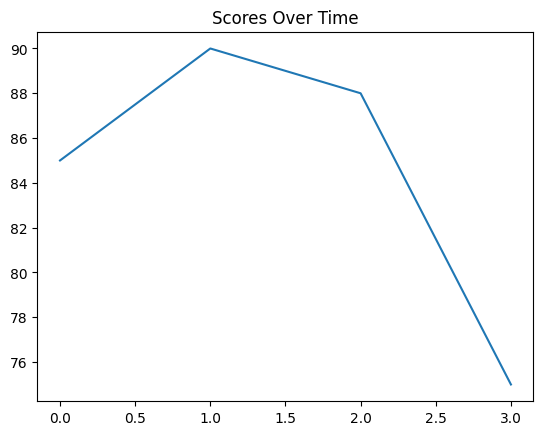

In [30]:
df['Score'].plot(kind='line', title='Scores Over Time')

### b. Bar Plot

<Axes: title={'center': 'Average Scores by Name'}, xlabel='Name'>

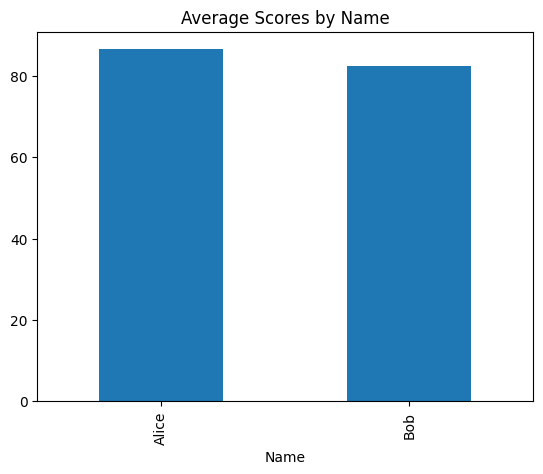

In [31]:
df.groupby('Name')['Score'].mean().plot(kind='bar', title='Average Scores by Name')

### c. Histogram

<Axes: title={'center': 'Score Distribution'}, ylabel='Frequency'>

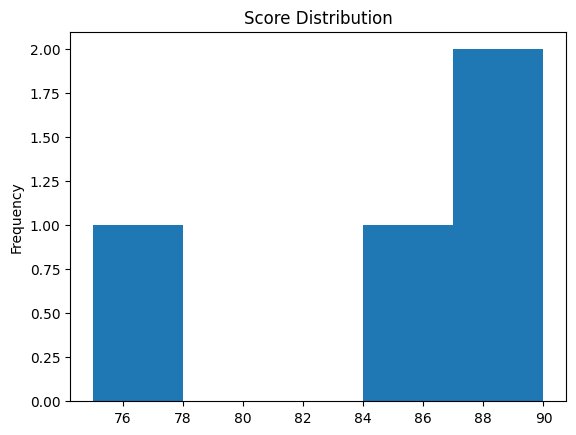

In [32]:
df['Score'].plot(kind='hist', bins=5, title='Score Distribution')

### d. Scatter Plot

<Axes: title={'center': 'Age vs. Score'}, xlabel='Age', ylabel='Score'>

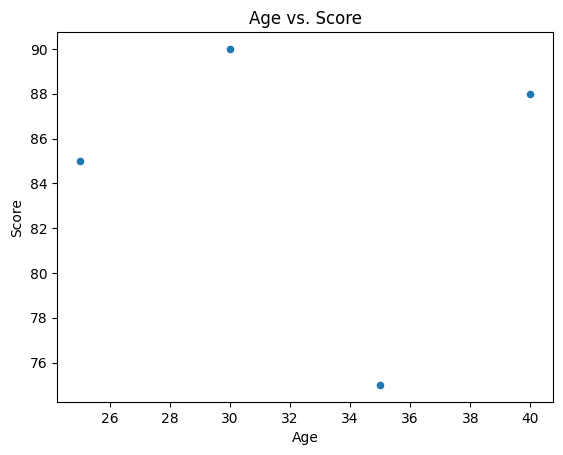

In [33]:
df.plot(kind='scatter', x='Age', y='Score', title='Age vs. Score')

### e. Box Plot

<Axes: title={'center': 'Score'}, xlabel='Category'>

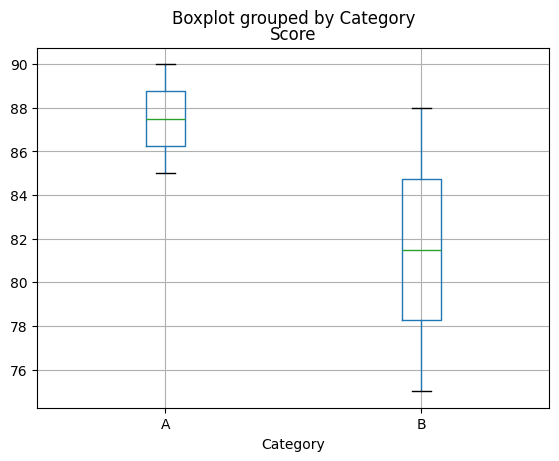

In [34]:
df.boxplot(column='Score', by='Category')

---

# 4. Data Preprocessing for Machine Learning
Data preprocessing is a critical step in preparing raw data for machine learning models. It ensures data quality and optimizes model performance. Below are the steps and techniques to preprocess data using Pandas, focusing on key tasks relevant to machine learning.

## 4.1 Handling Missing Data
Missing data can significantly affect the performance of a machine learning model. You can either remove or impute missing values.

### a. Identifying Missing Data

In [51]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, None, 4], 'B': [5, None, None, 8]}
df = pd.DataFrame(data)

# Check for missing values
print(df.isnull())
print(df.isnull().sum())

       A      B
0  False  False
1  False   True
2   True   True
3  False  False
A    1
B    2
dtype: int64


### b. Dropping Missing Data

In [47]:
# Drop rows with missing values
df_dropped = df.dropna()

# Drop columns with missing values
df_dropped_columns = df.dropna(axis=1)

print(df_dropped)
print(df_dropped_columns)

     A    B
0  1.0  5.0
3  4.0  8.0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


- **dropna()** is a pandas method used to remove missing data (NaN values) from a DataFrame.
- By default, axis=0, which means it checks rows for missing values.
- **axis=1**:
Specifies that the operation should be performed along columns (not rows).

- **df.dropna(axis=1)**:
Checks each column in the DataFrame.
If a column contains any missing value (NaN), it is excluded from the resulting DataFrame.

### c. Filling Missing Values

In [52]:
# Fill with a specific value
df_filled = df.fillna(0)

# Fill with column mean, median, or mode
df['A'] = df['A'].fillna(df['A'].mean())
df['B'] = df['B'].fillna(df['B'].median())
print(df_filled)
print(df)

     A    B
0  1.0  5.0
1  2.0  0.0
2  0.0  0.0
3  4.0  8.0
          A    B
0  1.000000  5.0
1  2.000000  6.5
2  2.333333  6.5
3  4.000000  8.0


---

## 4.2 Encoding Categorical Data
Machine learning models require numerical inputs. You need to convert categorical data into numbers.

### a. Label Encoding
Converts categories into integers.

In [56]:
from sklearn.preprocessing import LabelEncoder

# Example DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C']})

# Apply label encoding
label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])
print(df)

  Category  Category_Encoded
0        A                 0
1        B                 1
2        A                 0
3        C                 2


- **A LabelEncoder** object is instantiated.
- **The fit_transform() method**:
>- **fit**: Learns the unique categories (A, B, C) and assigns a numeric value to each.
>- **transform**: Converts the categorical values into these numeric labels:

>A → 0


>B → 1


>C → 2
- A new column, 'Category_Encoded', is added to the DataFrame with these numerical labels.

### b. One-Hot Encoding
Creates binary columns for each category.

In [57]:
df = pd.get_dummies(df, columns=['Category'])
print(df)

   Category_Encoded  Category_A  Category_B  Category_C
0                 0        True       False       False
1                 1       False        True       False
2                 0        True       False       False
3                 2       False       False        True


- **pd.get_dummies**:
>- Converts categorical data into multiple binary columns (one for each category).
>- Each new column represents whether the original value belongs to that specific category.

- The **columns=['Category']** argument specifies that only the 'Category' column should be transformed.

---

## 4.3 Feature Scaling
Feature scaling ensures that all numerical features are on a similar scale, improving model performance.

### a. Normalization (Min-Max Scaling)
Normalization, also known as Min-Max scaling, is a technique used to rescale numerical data into a fixed range, typically [0, 1]. This ensures that all features are on the same scale, which is crucial for many machine learning algorithms, particularly those that rely on distance calculations (e.g., k-NN, SVM) or gradient descent (e.g., neural networks).

#### Why Use Min-Max Scaling?
Some algorithms are sensitive to the scale of input data. Features with larger ranges can dominate over features with smaller ranges, which may lead to suboptimal performance. For example:

- **Gradient Descent**: Models like linear regression and neural networks rely on gradient descent, and if features are on vastly different scales, it can slow down the convergence or result in poor optimization.
- **Distance-based algorithms**: In algorithms like k-NN and SVM, the distance between points is calculated, so if one feature has a much larger scale than another, it can disproportionately influence the distance computation.

#### Formula for Min-Max Scaling
The formula for Min-Max scaling is:
$$ X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

Where:

- $X$ is the original value of the feature.
- $X_{min}$ is the minimum value of the feature in the dataset.
- $X_{max}$ is the maximum value of the feature in the dataset.
- $X_{scaled}$ is the normalized (scaled) value.

This formula rescales the values of a feature into the range [0, 1], with the minimum value of the feature mapped to 0 and the maximum value mapped to 1.

**Example 1: Basic Normalization Using Pandas**

In [63]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 10, 15, 20, 25]}
df = pd.DataFrame(data)

# Normalize column 'A' using Min-Max Scaling
df['A_normalized'] = (df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min())

print(df)

   A   B  A_normalized
0  1   5          0.00
1  2  10          0.25
2  3  15          0.50
3  4  20          0.75
4  5  25          1.00


**Example 2: Using Scikit-learn's MinMaxScaler**

In [64]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 10, 15, 20, 25]}
df = pd.DataFrame(data)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df[['A_scaled', 'B_scaled']] = scaler.fit_transform(df[['A', 'B']])

print(df)

   A   B  A_scaled  B_scaled
0  1   5      0.00      0.00
1  2  10      0.25      0.25
2  3  15      0.50      0.50
3  4  20      0.75      0.75
4  5  25      1.00      1.00


#### When to Use Min-Max Scaling?
1. **Distance-based algorithms** (e.g., k-NN, SVM, clustering): These models depend on the magnitude of the features, and scaling ensures that all features contribute equally to the distance computation.

2. **Gradient Descent-based algorithms** (e.g., logistic regression, neural networks): Min-Max scaling helps models converge faster by ensuring that the weights associated with each feature are adjusted proportionally.

#### When NOT to Use Min-Max Scaling?
1. **Outliers**: Min-Max scaling is sensitive to outliers. If your data contains significant outliers, they can skew the scaling, making the majority of your data fall within a very small range. For example:

- If your data has values in the range [1, 1000], but one value is 10,000, the scaled values for most of your data will be squeezed between 0 and 1.

>In such cases, consider using **Standardization** (Z-score scaling), which is less sensitive to outliers.

2. **Non-continuous data**: Min-Max scaling is primarily designed for continuous numerical features. If you have categorical data, you should encode those features first (e.g., via one-hot encoding) before applying scaling.

### b. Standardization (Z-Score Scaling)
Standardization, also known as **Z-score scaling**, is a technique used to scale numerical data by transforming it into a distribution with a mean of **0** and a standard deviation of **1**. Unlike **Min-Max scaling**, which resizes data to a fixed range, standardization transforms data in a way that the distribution of values is centered around 0, and most values are within a range of -1 to 1.

#### Why Use Standardization?
Standardization is particularly useful when:

1. **Features have different units or scales**: For example, one feature might be in meters, while another is in kilograms. Standardization ensures that both features are treated equally during training.
2. **Algorithms that rely on the distance between data points** (e.g., k-NN, SVM) or **gradient-based optimization** (e.g., logistic regression, neural networks) perform better when features are standardized.
3. **Outliers are not a major concern**: Unlike Min-Max scaling, which can be distorted by outliers, standardization is less sensitive because it uses the standard deviation, which is less influenced by extreme values.

#### Formula for Standardization (Z-Score Scaling)
The formula for standardization is:
$$ Z=\frac{X-\mu}{\sigma} $$
Where:

- $X$ is the original value of the feature.
- $\mu$ is the mean of the feature (average value).
- $\sigma$ is the standard deviation of the feature.
- $Z$ is the standardized value.

This formula transforms the feature into a distribution where:

- The mean is 0 (centered around 0).
- The standard deviation is 1.
- Most of the transformed data will fall between -3 and +3 (because of the properties of the normal distribution).

**Example 1: Basic Standardization Using Pandas**

In [65]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 10, 15, 20, 25]}
df = pd.DataFrame(data)

# Calculate the mean and standard deviation
mean_A = df['A'].mean()
std_A = df['A'].std()

# Standardize column 'A'
df['A_standardized'] = (df['A'] - mean_A) / std_A

print(df)

   A   B  A_standardized
0  1   5       -1.264911
1  2  10       -0.632456
2  3  15        0.000000
3  4  20        0.632456
4  5  25        1.264911


**Example 2: Using Scikit-learn's StandardScaler**

In [66]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3, 4, 5], 'B': [5, 10, 15, 20, 25]}
df = pd.DataFrame(data)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df[['A_standardized', 'B_standardized']] = scaler.fit_transform(df[['A', 'B']])

print(df)

   A   B  A_standardized  B_standardized
0  1   5       -1.414214       -1.414214
1  2  10       -0.707107       -0.707107
2  3  15        0.000000        0.000000
3  4  20        0.707107        0.707107
4  5  25        1.414214        1.414214


In this case, StandardScaler from scikit-learn automatically calculates the mean and standard deviation for each feature and standardizes it, just like the manual method but more efficient.

#### When to Use Standardization?
1. Machine learning algorithms that are sensitive to the scale of data:

- **Distance-based models**: Algorithms like **k-Nearest Neighbors (k-NN)** and **Support Vector Machines (SVM)** use distance metrics (like Euclidean distance) that depend on the scale of features. Standardizing the data ensures that no single feature dominates the distance calculation.
- **Gradient-based models**: Models that use gradient descent optimization (like **Logistic Regression**, **Neural Networks**, and **Linear Regression**) benefit from standardized data because it speeds up convergence during training.

2. **When data has varying ranges or units**: If you have features with different units (e.g., age in years and income in dollars), standardization makes the data comparable.

#### When NOT to Use Standardization?
1. **When data is already scaled**: If your data is already on a similar scale (e.g., all features are already between 0 and 1), you may not need to standardize it.
2. **Non-continuous or categorical data**: Standardization is only appropriate for continuous numerical data. Categorical data should first be encoded (e.g., one-hot encoding or label encoding) before scaling.

#### Pros and Cons of Standardization
**Pros**:

- **Robust to outliers**: Although it's not completely immune to outliers, standardization is less sensitive than Min-Max scaling because it uses the standard deviation.
- **No specific range**: Unlike Min-Max scaling, the data is not constrained to a specific range (e.g., [0, 1]), which is helpful for many machine learning models.
- **Effective for distance-based and gradient-based models**: Most machine learning algorithms benefit from standardization when features have varying ranges.

**Cons**:

- **Outliers affect the mean and standard deviation**: Large outliers can shift the mean and increase the standard deviation, which might distort the scaling.
- **Not suitable for categorical data**: You cannot standardize categorical data directly; it needs to be encoded first.
---

## 4.4 Splitting Data
Splitting data is an essential step in the machine learning workflow to evaluate the model's performance and ensure that it generalizes well to unseen data. The primary goal is to split the dataset into at least two parts:

- **1. Training Data**: This is used to train the model, helping it learn the patterns in the data.
- **2. Testing Data**: This is used to evaluate the model's performance on unseen data, simulating how the model will perform in a real-world scenario.

In addition to training and testing data, sometimes you also split the data into a third set: 
- **3. Validation Data**: This set is used during model training to tune hyperparameters and choose the best model. This is typically used in models that require hyperparameter tuning, such as decision trees, support vector machines, or neural networks.

### Why Split Data?
- **1. Avoid Overfitting**: If a model is trained and tested on the same data, it may memorize (overfit) the training data rather than learning generalizable patterns. By splitting the data, you ensure that the model is evaluated on data it hasn't seen before, helping to detect overfitting.

- **2. Model Evaluation**: Testing data is used to simulate how the model will perform on unseen data, which is crucial for evaluating the model's real-world performance.

- **3. Hyperparameter Tuning**: Having a validation set enables you to tune model hyperparameters without "leaking" information from the test set.

### Common Methods for Splitting Data
#### 1. Train-Test Split
This is the most straightforward approach, where you split the dataset into two parts: a training set and a testing set.

- **Train-Test Split ratio**: A common split is **80/20** or **70/30**, where 80% (or 70%) of the data is used for training, and the remaining 20% (or 30%) is used for testing. However, the exact ratio can vary depending on the size of the dataset.

**Example in Scikit-learn:**

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Sample DataFrame
data = {'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [5, 4, 3, 2, 1],
        'Target': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Split data into features (X) and target (y)
X = df[['Feature1', 'Feature2']]  # Feature columns
y = df['Target']  # Target column

# Perform Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("data:\n", df)
print("Training Features:\n", X_train)
print("\nTesting Features:\n", X_test)

data:
    Feature1  Feature2  Target
0         1         5       1
1         2         4       0
2         3         3       1
3         4         2       0
4         5         1       1
Training Features:
    Feature1  Feature2
4         5         1
2         3         3
0         1         5
3         4         2

Testing Features:
    Feature1  Feature2
1         2         4


- *train_test_split*: Splits data into training and testing sets for machine learning.

**Data**:
- *Feature1* and *Feature2* are the features (independent variables).
- *Target* is the dependent variable (what you want to predict).

**Splitting**:
- *X*: Feature columns.
- *y*: Target column.
- 80% of the data is assigned to training *(X_train, y_train)*, and 20% to testing *(X_test, y_test)*.
- *random_state=42* ensures reproducibility of the split.

**Key Points About test_size:**

**1. Value Range:**

- It can be a float between 0.0 and 1.0, or an integer.
- **Float**: Represents the fraction of the dataset to be used as the testing set.
>- Example: *test_size=0.2* means 20% of the dataset will be used for testing.

- Integer: Specifies the exact number of samples to include in the testing set.

>- Example: test_size=2 means two samples will be used for testing.

**2. Default Value**:

- If not specified, the default value is *test_size=0.25* (25% for testing).

**3. Complementary to** *train_size*:

- If both *test_size* and *train_size* are not specified, the split defaults to 75% training and 25% testing.
- If you specify one, the other is automatically determined. For instance, *test_size=0.2* implies *train_size=0.8*.

#### 2. Train-Validation-Test Split
This method is used when you want to split the data into three sets: one for training, one for validation, and one for testing.

- **Train-Validation-Test Split ratio**: A typical split might be **60/20/20**, where 60% of the data is used for training, and 20% is used for both validation and testing.

**Example of Train-Validation-Test Split:**

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Sample DataFrame
data = {'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [5, 4, 3, 2, 1],
        'Target': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Split data into features (X) and target (y)
X = df[['Feature1', 'Feature2']]  # Feature columns
y = df['Target']  # Target column

# Split into 60% train and 40% temp (for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the 40% temp into 50% validation and 50% test (20% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training Features:\n", X_train)
print("\nValidation Features:\n", X_val)
print("\nTesting Features:\n", X_test)

Training Features:
    Feature1  Feature2
2         3         3
0         1         5
3         4         2

Validation Features:
    Feature1  Feature2
1         2         4

Testing Features:
    Feature1  Feature2
4         5         1


Now, the data is split into three parts: 60% for training, 20% for validation, and 20% for testing.

#### 3. K-Fold Cross-Validation
K-fold cross-validation is a more robust method, especially when you have a smaller dataset. It involves splitting the data into **K** subsets (or folds). The model is trained **K times**, each time using **K-1** folds for training and the remaining fold for testing. The model’s final performance is averaged over all K iterations.

- Common values for **K**: Typically, **K = 5 or 10**, but you can choose a different value depending on the dataset size.
- **Cross-validation** helps mitigate the risk of the model performing well on a single test split but failing on other splits.

**Example of K-Fold Cross-Validation in Scikit-learn**:

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# Sample DataFrame
data = {'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [5, 4, 3, 2, 1],
        'Target': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Split data into features (X) and target (y)
X = df[['Feature1', 'Feature2']]  # Feature columns
y = df['Target']  # Target column

# Initialize a model
model = RandomForestClassifier()

# Perform 2-fold cross-validation and return the scores
cv = StratifiedKFold(n_splits=2)  # Reduce splits to match the smallest class count
scores = cross_val_score(model, X, y, cv=cv)

print("Cross-validation scores: ", scores)
print("Average accuracy: ", scores.mean())

Cross-validation scores:  [0.33333333 0.5       ]
Average accuracy:  0.41666666666666663


- A **Random Forest Classifier** is initialized. This is an ensemble learning model that uses multiple decision trees for classification tasks.